# In this Project our task is to Analyze how different user interaction metrics affect customer yearly spending and determine which platform (website or mobile app) contributes more to revenue generation.

#### Data Loading and inspection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
customers= pd.read_csv('Ecommerce Customers.csv')
customers.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [8]:
customers.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


#### EXPLORATORY DATA ANALYSIS


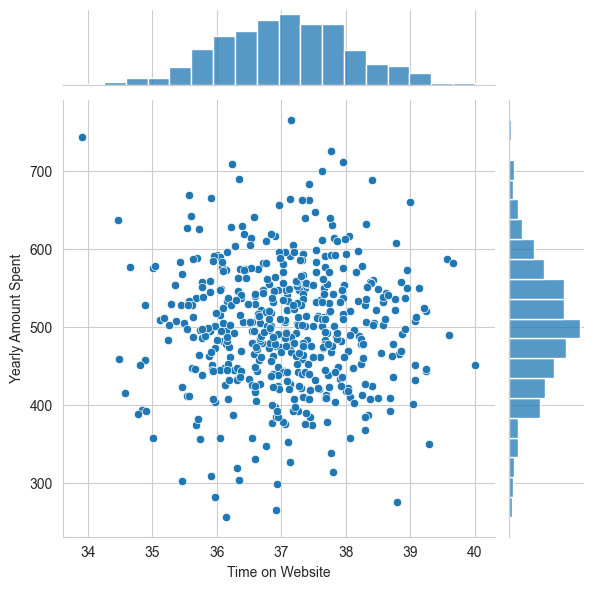

In [17]:
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website', y= 'Yearly Amount Spent',data=customers)

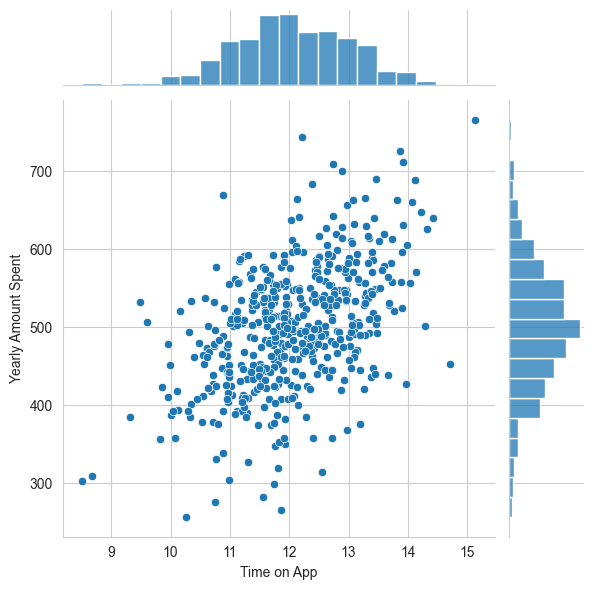

In [19]:
sns.set_style('whitegrid')
sns.jointplot(x='Time on App',y='Yearly Amount Spent', data=customers)

As usage of app increases the spending also increases which is linear 

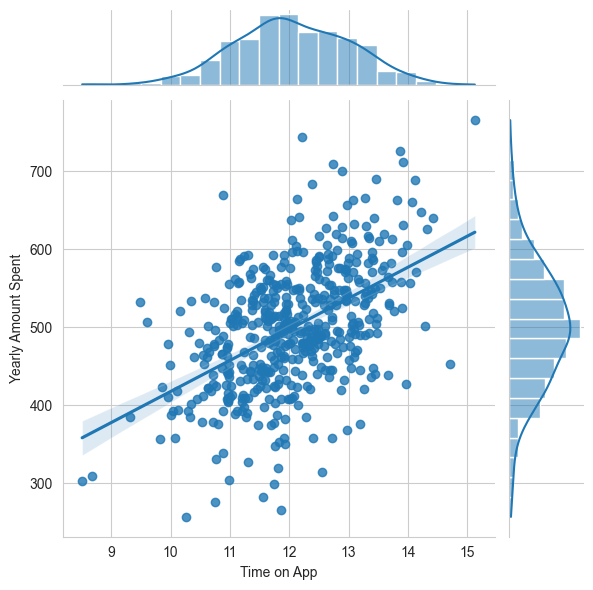

In [20]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, kind='reg')


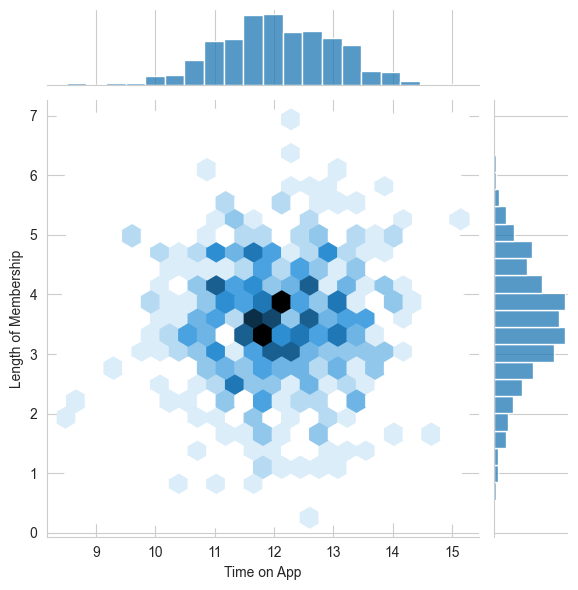

In [22]:
sns.jointplot(x= 'Time on App', y='Length of Membership', kind='hex', data=customers)

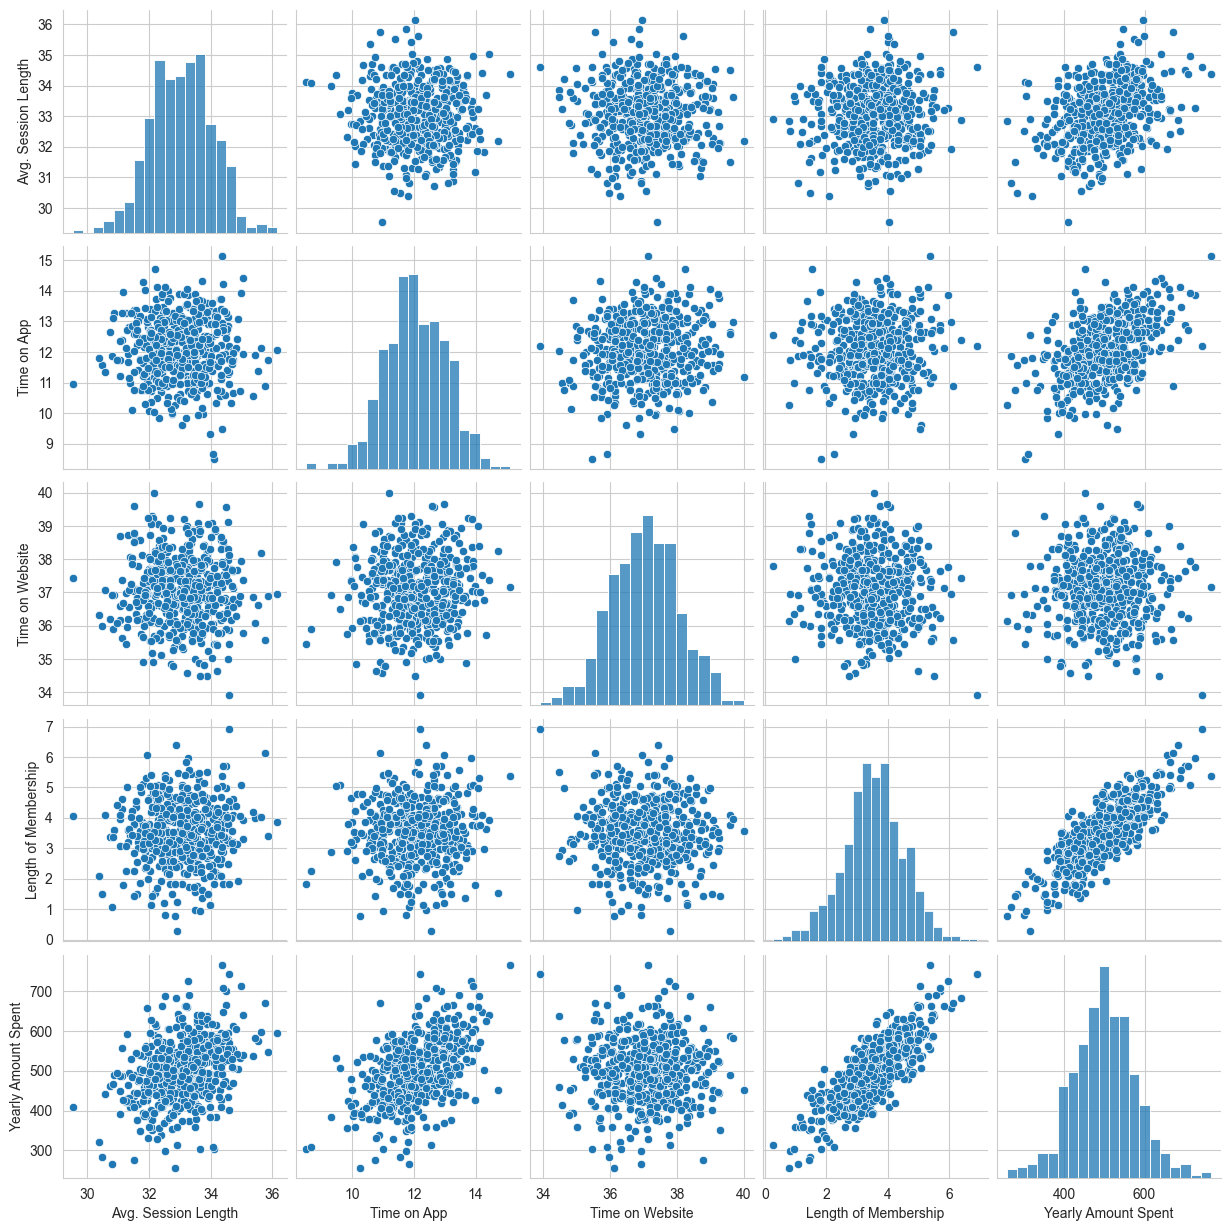

In [23]:
sns.pairplot(customers)

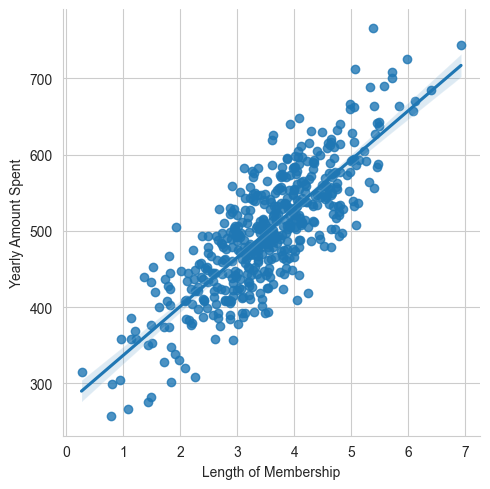

In [24]:
sns.lmplot(x= 'Length of Membership', y= 'Yearly Amount Spent', data=customers)

TESTING AND TRAINING DATAS 

In [29]:
from sklearn.model_selection import train_test_split
y=customers['Yearly Amount Spent']
X= customers[['Avg. Session Length','Time on App', 'Time on Website','Length of Membership']]
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=101)

#### Model Building

In [32]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [33]:
#coefficient 
print('Coeffcients : \n ',lm.coef_)

Coeffcients : 
  [25.98154972 38.59015875  0.19040528 61.27909654]


PREDICTING TEST DATA

In [36]:
Predictions= lm.predict(X_test)

Text(0, 0.5, 'Predictions')

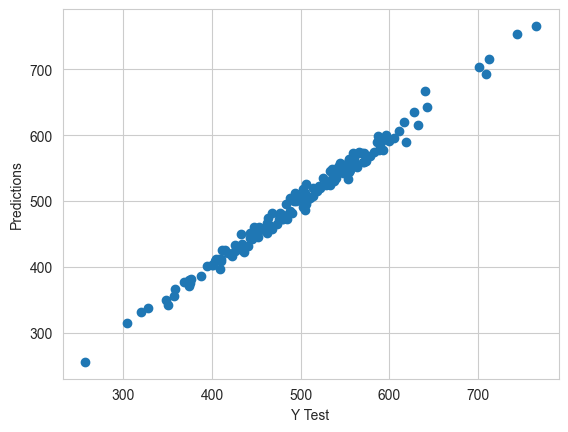

In [37]:
plt.scatter(y_test,Predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

#### Model Evaluation

In [39]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,Predictions))
print('MSE:', metrics.mean_squared_error(y_test, Predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,Predictions)))

MAE: 7.228148653430817
MSE: 79.81305165097417
RMSE: 8.93381506697862


In [41]:
residual= y_test-Predictions
residual

18    -4.126186
361   -1.686918
104    0.816457
4      7.975058
156   -3.858503
         ...   
147    1.431172
346    3.977230
423    3.521249
17    -3.822028
259   -0.080551
Name: Yearly Amount Spent, Length: 150, dtype: float64

Conclusion\
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

In [42]:
coefficients= pd.DataFrame(lm.coef_,X.columns)
coefficients.columns=['Coefficient']
coefficients

Coefficient
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097

## Interpreting the data
### Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
### Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
### Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
### Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

# The conclution is pretty clear: You may want to improve the App because it asociated with higher sells.
## The length of membership was found to be the most important predictor of yearly spending.
## Time spent on the mobile app has a stronger positive impact on spending than time spent on the website.

# Recommendation:

## The company should focus on improving the mobile app experience rather than allocating more resources to the website.